                              “Airline Crisis: Delay & Operational Breakdown Analysis”                       



Project Insight:
This project uses real-world flight data to analyze airline operations, delays, and cancellations through data-driven visualizations. By applying Exploratory Data Analysis (EDA), the project uncovers patterns in flight performance across airlines and days, helping to better understand operational efficiency and reliability in the aviation industry. The dataset used for this analysis was sourced from Kaggle.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


insight :
This code imports Pandas for data manipulation and Matplotlib for visualization, giving you the ability to analyze datasets and then plot them into clear, customizable charts.


In [10]:
df = pd.read_csv("NEW FLIGHT.CSV")


insight : 
this code helps to read the csv file.

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 1098 non-null   int64  
 1   MONTH                1098 non-null   int64  
 2   DAY                  1098 non-null   int64  
 3   DAY_OF_WEEK          1098 non-null   int64  
 4   AIRLINE              1098 non-null   object 
 5   FLIGHT_NUMBER        1098 non-null   int64  
 6   TAIL_NUMBER          1096 non-null   object 
 7   ORIGIN_AIRPORT       1098 non-null   object 
 8   DESTINATION_AIRPORT  1098 non-null   object 
 9   SCHEDULED_DEPARTURE  1098 non-null   int64  
 10  DEPARTURE_TIME       1013 non-null   float64
 11  DEPARTURE_DELAY      1013 non-null   float64
 12  TAXI_OUT             1013 non-null   float64
 13  WHEELS_OFF           1013 non-null   float64
 14  SCHEDULED_TIME       1098 non-null   int64  
 15  ELAPSED_TIME         1012 non-null   f

In [12]:
df.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

insight: 
df.columns in Pandas returns an Index object listing all the column names of your DataFrame, which is useful for quickly checking the structure of your dataset or iterating over columns for analysis.


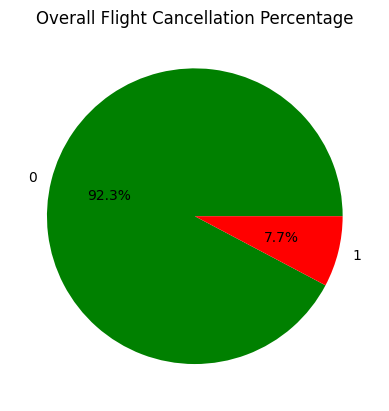

In [24]:
df['CANCELLED'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['green', 'red']
)
plt.title("Overall Flight Cancellation Percentage")
plt.ylabel("")
plt.show()


Insight:
The pie chart shows the overall proportion of cancelled and on-time flights. A much larger share of flights are completed successfully, indicating stable airline operations.

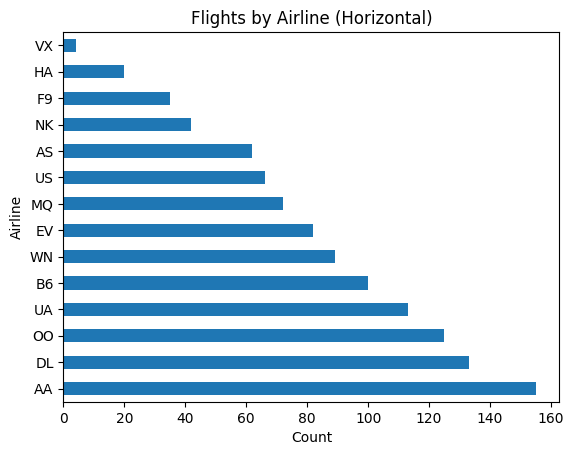

In [25]:
df['AIRLINE'].value_counts().plot(kind='barh')
plt.title("Flights by Airline (Horizontal)")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()


Insight:
This chart shows the number of flights operated by each airline. Airlines like AA and DL have the highest number of flights, indicating larger operations, while VX and HA operate fewer flights.

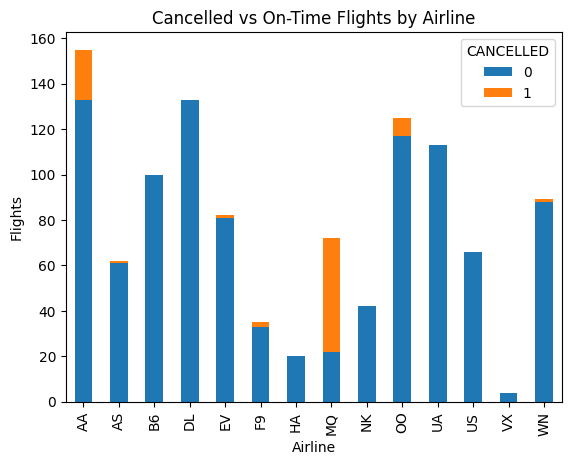

In [26]:
pd.crosstab(df['AIRLINE'], df['CANCELLED']).plot(kind='bar', stacked=True)
plt.title("Cancelled vs On-Time Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Flights")
plt.show()


Insight:
This chart shows the number of flights operated by each airline. Airlines like AA and DL have the highest number of flights, indicating larger operations, while VX and HA operate fewer flights.

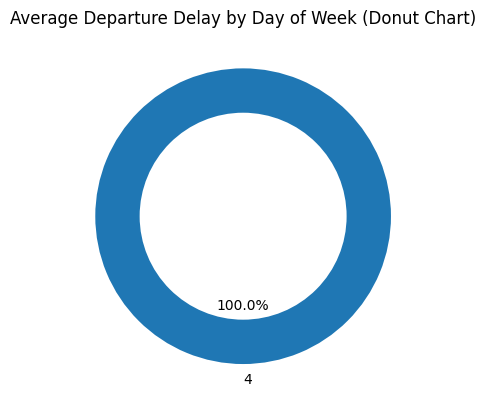

In [39]:
avg_delay = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
plt.pie(
    avg_delay,
    labels=avg_delay.index,
    autopct='%1.1f%%',
    startangle=90
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Average Departure Delay by Day of Week (Donut Chart)")
plt.show()


Insight:
The donut chart represents how average departure delays are distributed across days of the week. Certain days contribute more to delays, helping identify peak congestion periods

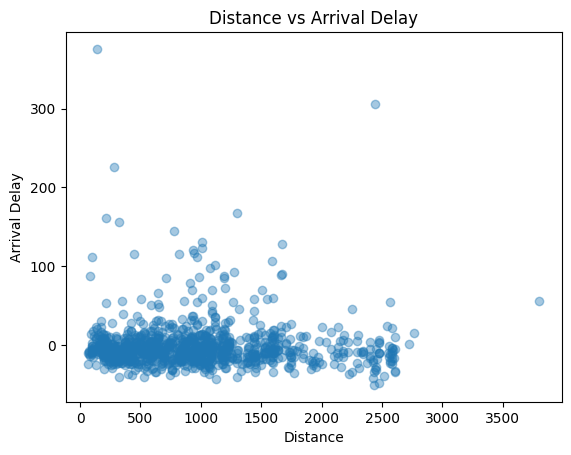

In [40]:
plt.scatter(df['DISTANCE'], df['ARRIVAL_DELAY'], alpha=0.4)
plt.title("Distance vs Arrival Delay")
plt.xlabel("Distance")
plt.ylabel("Arrival Delay")
plt.show()


Insight:
This scatter plot examines the relationship between flight distance and arrival delay. It shows that longer distances do not always result in higher delays, indicating a weak correlation.

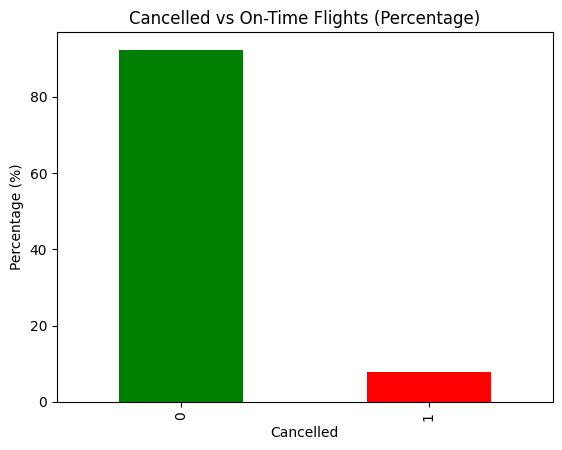

In [41]:
(df['CANCELLED'].value_counts(normalize=True) * 100).plot(
    kind='bar',
    color=['green', 'red']
)
plt.title("Cancelled vs On-Time Flights (Percentage)")
plt.xlabel("Cancelled")
plt.ylabel("Percentage (%)")
plt.show()


Insight:
The percentage bar chart clearly compares cancelled and on-time flights. It shows that cancellations form only a small percentage of total flights

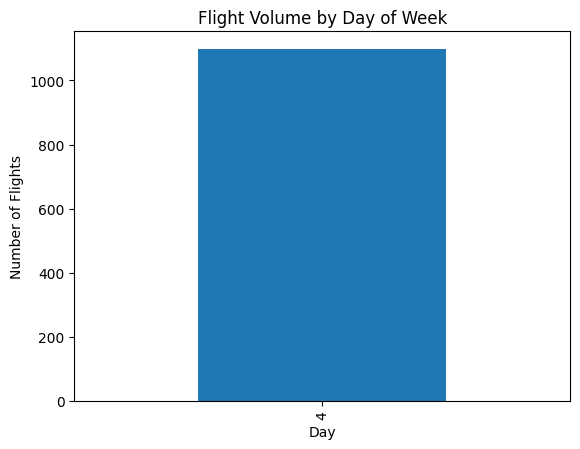

In [46]:
df.groupby('DAY_OF_WEEK')['FLIGHT_NUMBER'].count().plot(kind='bar')
plt.title("Flight Volume by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Flights")
plt.show()



Insight:
This column chart compares the number of flights across different days of the week. It helps identify high-traffic and low-traffic days.

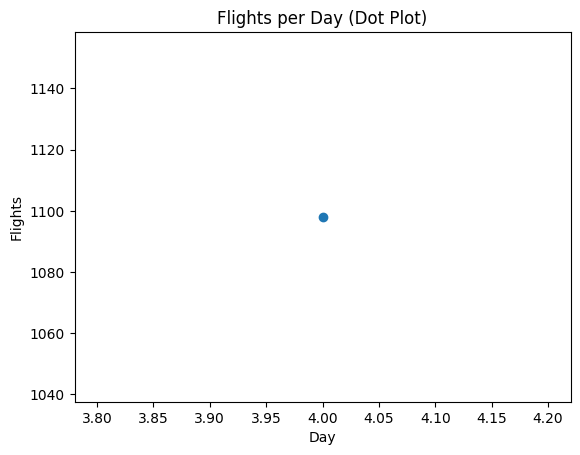

In [47]:
counts = df['DAY_OF_WEEK'].value_counts().sort_index()
plt.plot(counts.index, counts.values, 'o')
plt.title("Flights per Day (Dot Plot)")
plt.xlabel("Day")
plt.ylabel("Flights")
plt.show()


Insight:
The dot plot presents daily flight counts in a simple format. It allows easy comparison of flight volume without using bars or filled areas.

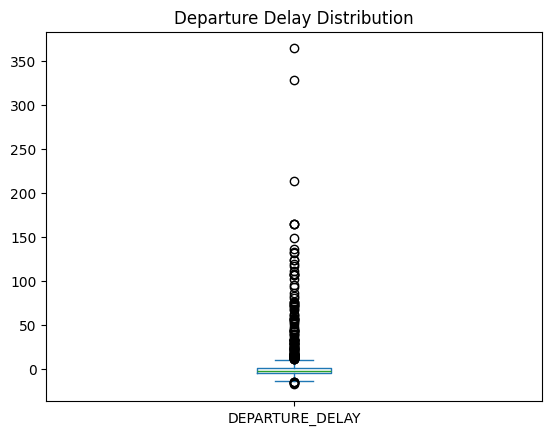

In [48]:
df[['DEPARTURE_DELAY']].dropna().plot(kind='box')
plt.title("Departure Delay Distribution")
plt.show()


Insight:
The box plot summarizes the distribution of departure delays. It highlights the median delay and shows the presence of extreme delay outliers.

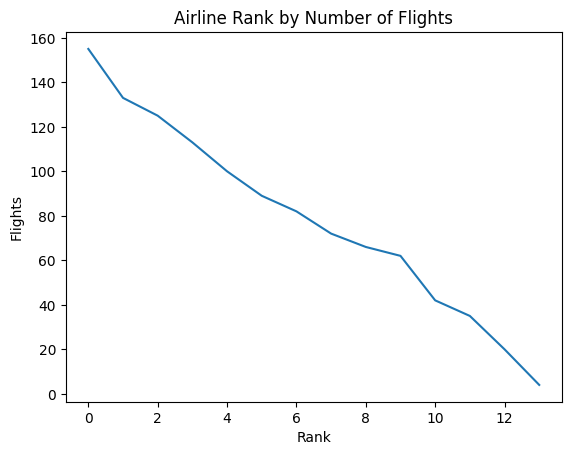

In [49]:
airline_rank = df['AIRLINE'].value_counts()
plt.plot(airline_rank.values)
plt.title("Airline Rank by Number of Flights")
plt.xlabel("Rank")
plt.ylabel("Flights")
plt.show()


Insight:
This rank chart orders airlines based on the number of flights operated. It shows a sharp drop after top airlines, indicating uneven market distribution.

Conclusion :
In this project, Exploratory Data Analysis (EDA) was carried out on airline flight data to understand flight delays and operational patterns. First, the dataset was cleaned by handling missing values, removing duplicate records, and converting date columns into useful formats. New columns such as delay status, day of the week, and month were created to make the analysis easier and more meaningful.

Different types of charts like histograms, bar charts, box plots, pie charts, scatter plots, and line charts were used to analyze arrival delays, cancellations, flight distances, taxi-out time, and airline performance. From the analysis, it was observed that most flights are on time, while delays depend on factors such as the airline, day of travel, and month. Some airlines showed better on-time performance compared to others.

Overall, this project shows how EDA and visualization techniques help in understanding large datasets. By using data-driven analysis, raw flight data was converted into useful insights that help in understanding airline performance and operational trends.